In [32]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
warnings.filterwarnings('ignore')

In [33]:
data = pd.read_csv("cardio_train.csv")

# Overview 

In [34]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,18393,2,168,62,0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,0,100,60,1,1,0,0,0,0


In [35]:
data.shape

(70000, 14)

# Checking Missing Value

In [36]:
data.isnull().sum().sum()

0

In [37]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
output         0
dtype: int64

# For X and Y column 

In [38]:
X=data.iloc[:,1:-1].to_numpy()
Y=data.iloc[:,-1:].to_numpy().squeeze()
colu = data.iloc[:,1:-1]

# Before Remove Outlier

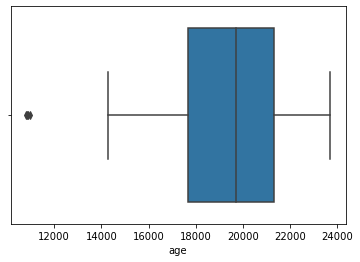

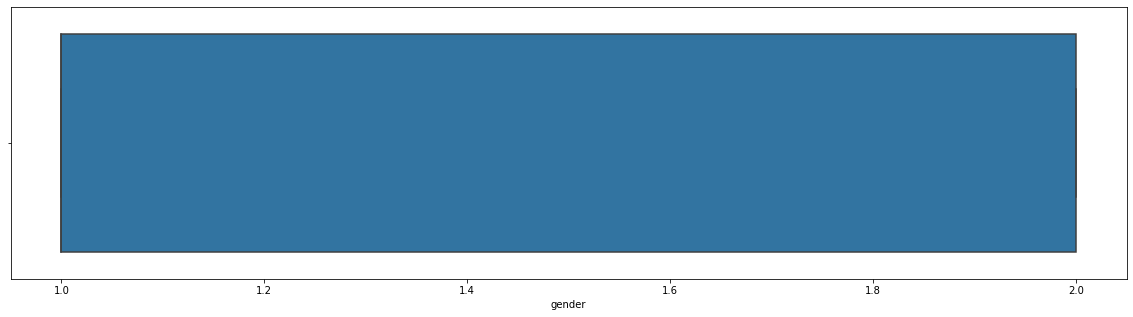

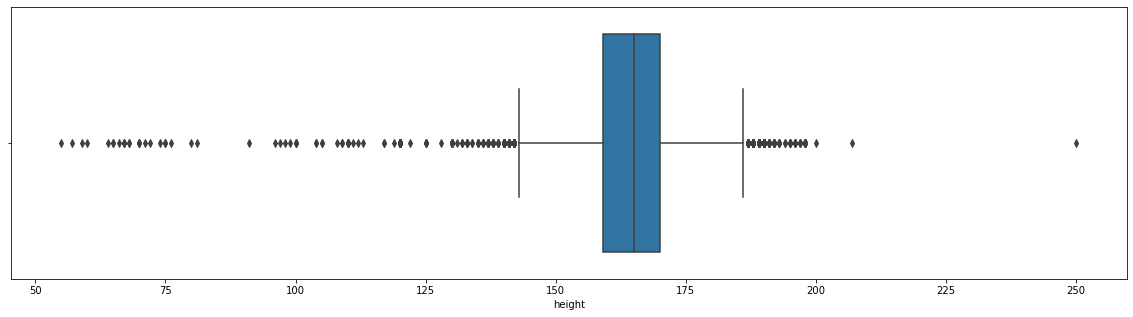

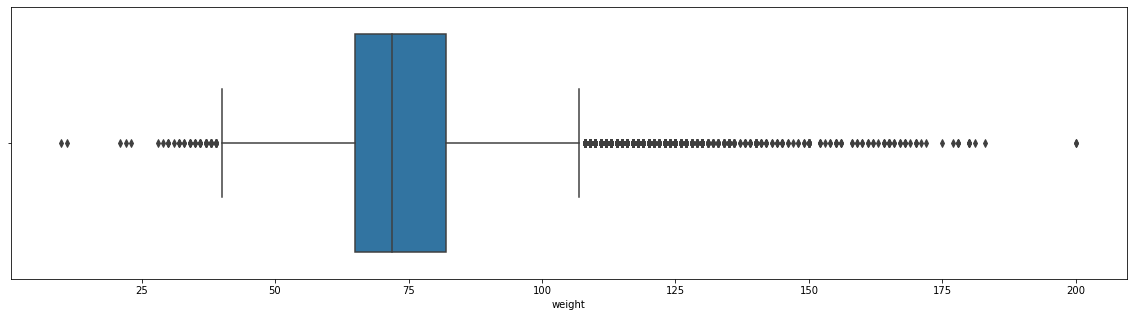

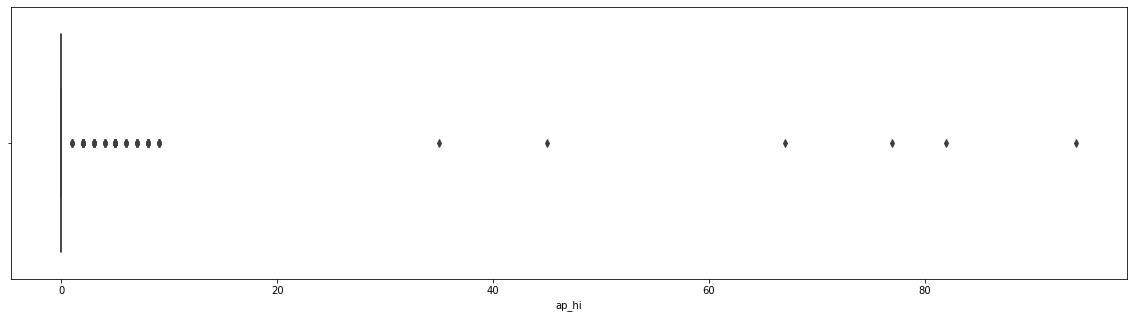

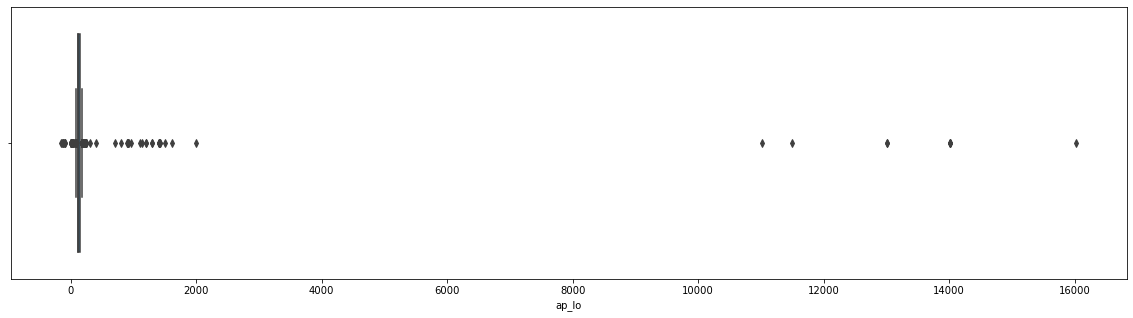

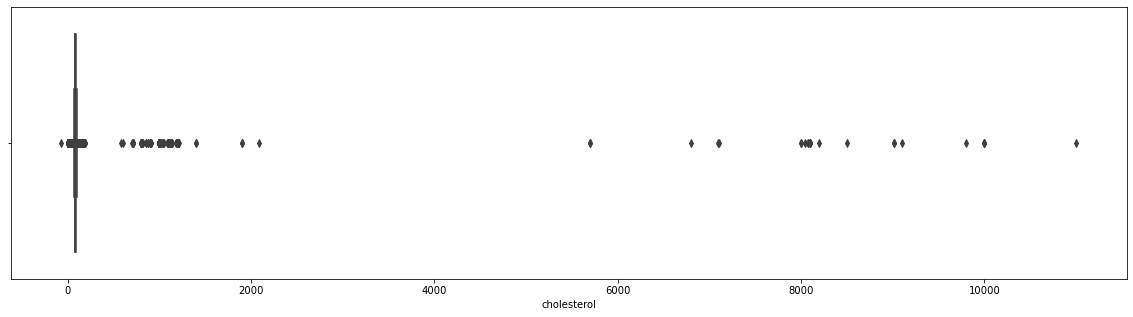

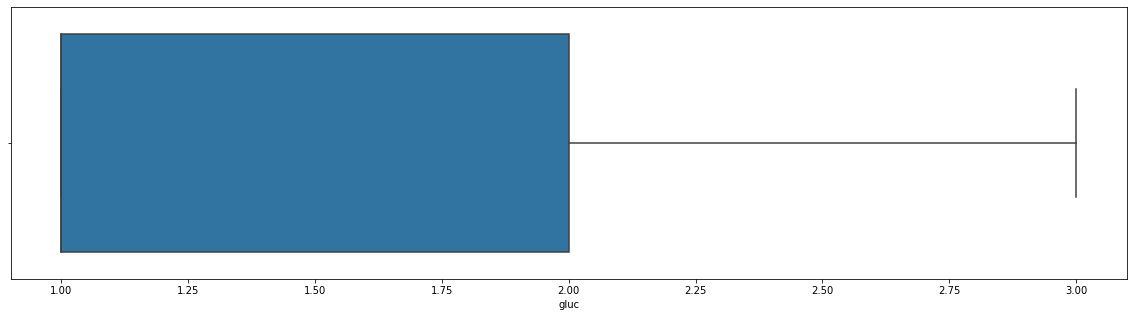

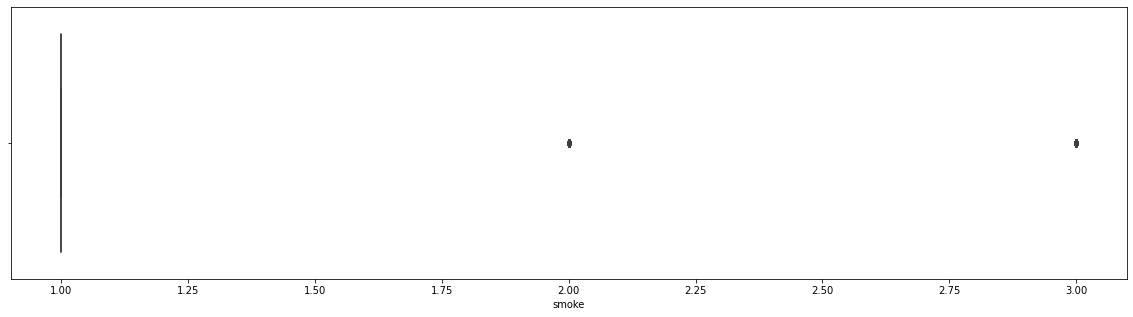

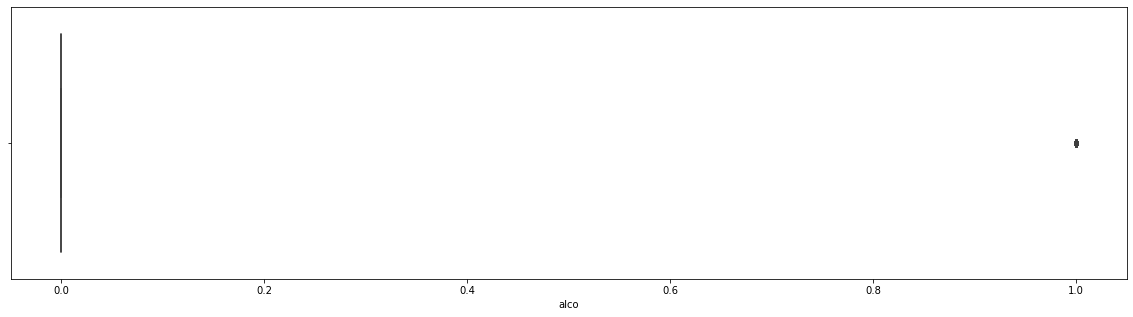

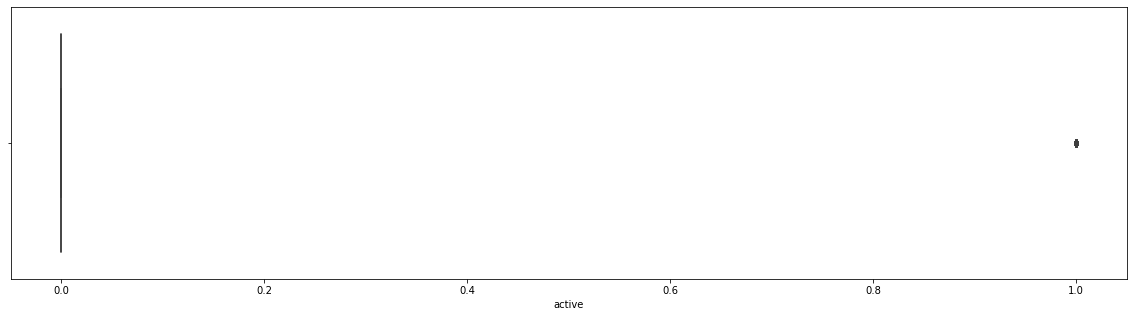

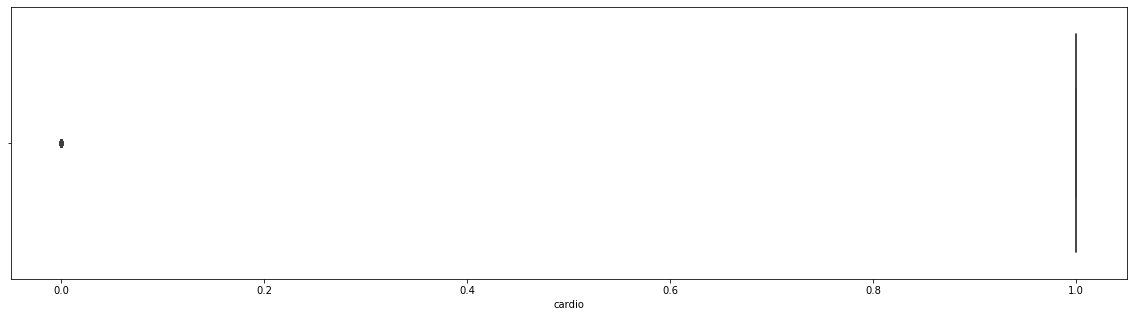

<Figure size 1440x360 with 0 Axes>

In [39]:
for i in data.iloc[:,1:-1]:
    sns.boxplot(data[i])
    plt.figure(figsize=(20,5))

# Outlier Detect and Handle Function

In [40]:
def outlier(coloumn):
    Q1 = coloumn.quantile(0.25)
    Q3 = coloumn.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    coloumn=np.where(coloumn>upper_whisker,upper_whisker,np.where(coloumn<lower_whisker,lower_whisker,coloumn))
    #sns.boxplot(coloumn)
    return coloumn

# Handle Outlier

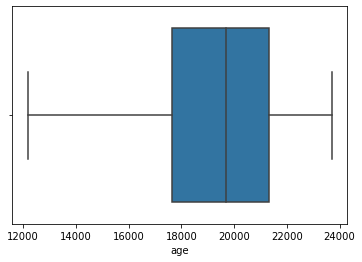

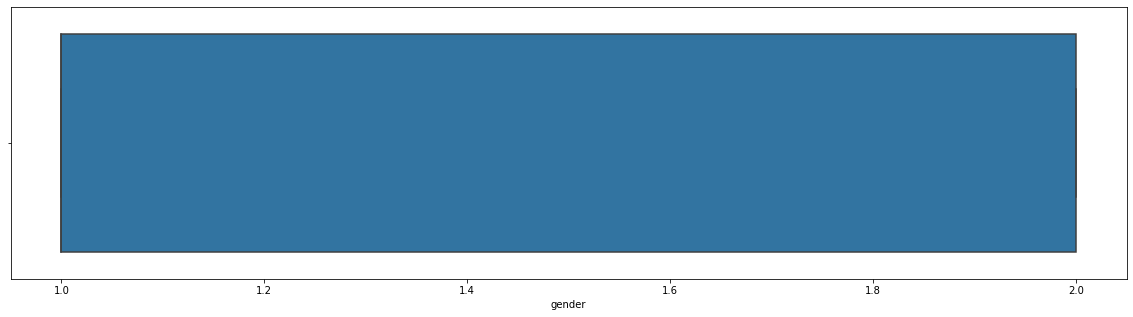

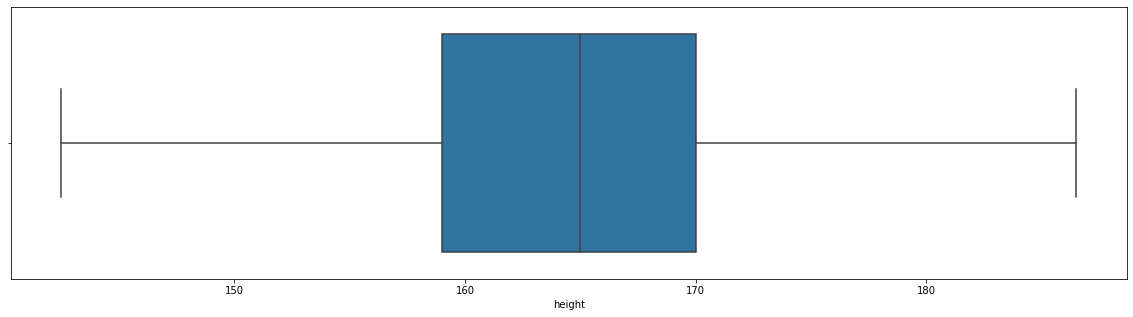

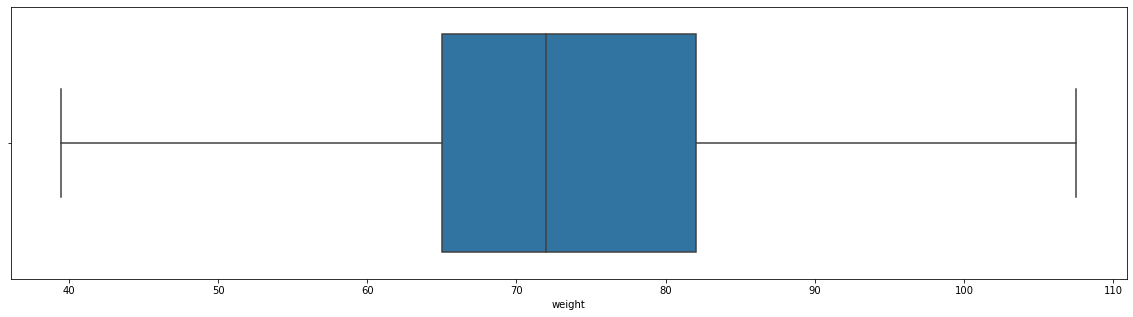

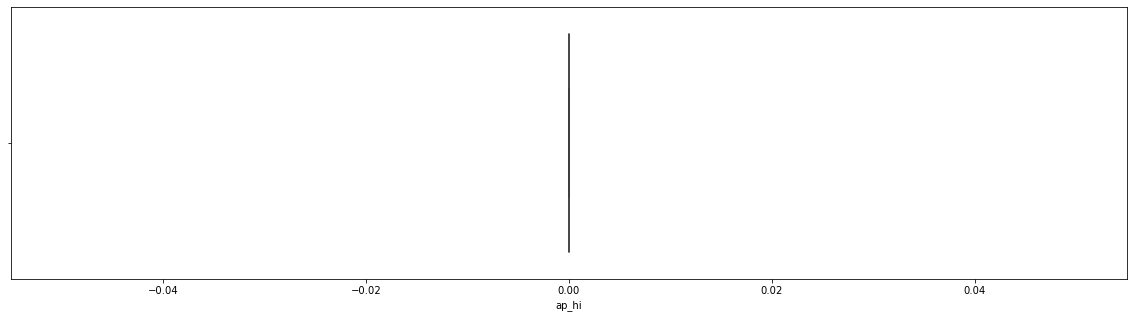

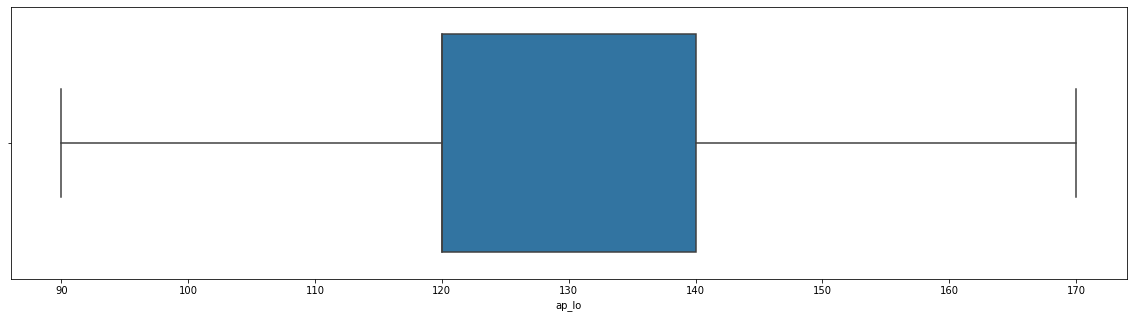

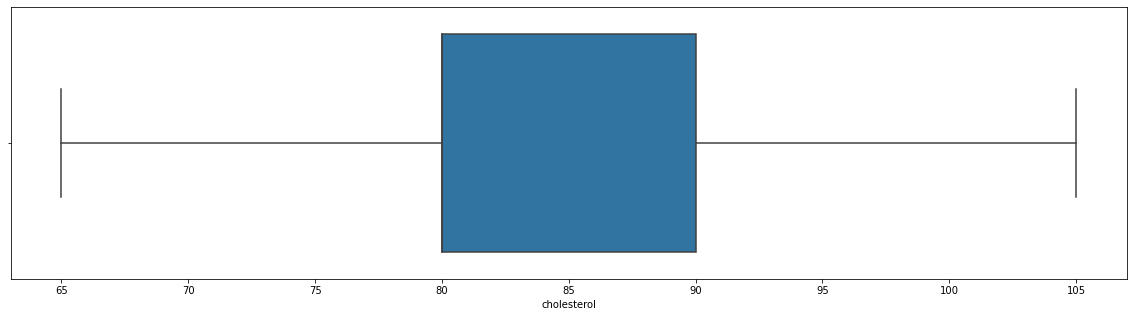

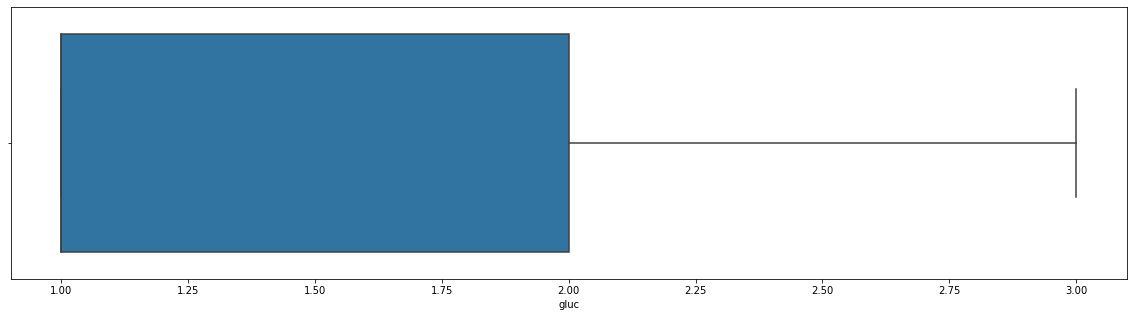

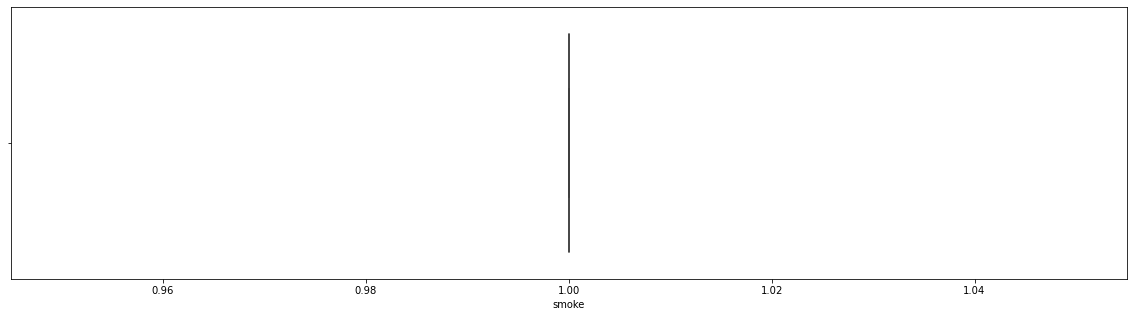

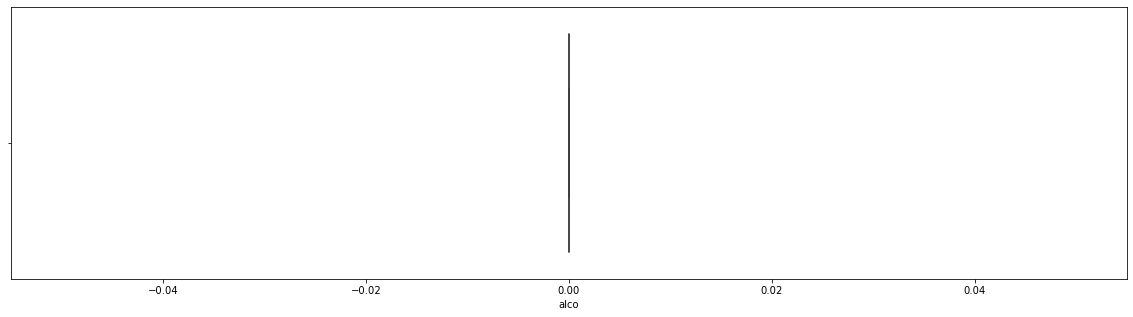

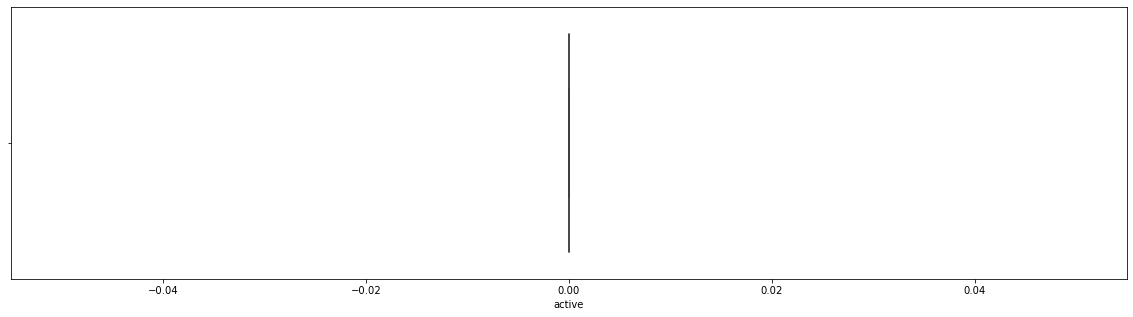

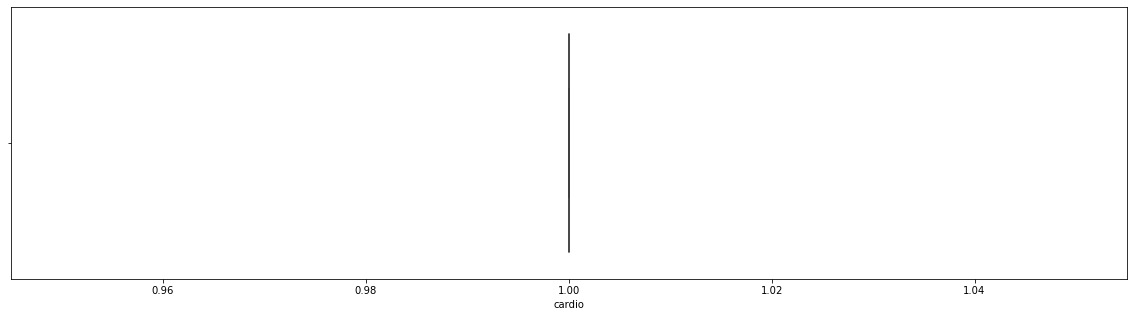

<Figure size 1440x360 with 0 Axes>

In [41]:
for i in data.iloc[:,1:-1]:
    data[i] = outlier(data[i])
    sns.boxplot(data[i])
    plt.figure(figsize=(20,5))

# Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.30, random_state=8)

x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, random_state=8)

print("X train shape: ", x_train.shape)
print("X validation shape: ", x_val.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y validation shape: ", y_val.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (49000, 12)
X validation shape:  (10500, 12)
X test shape:  (10500, 12)
Y train shape:  (49000,)
Y validation shape:  (10500,)
Y test shape:  (10500,)


# Applying Standard Scaling

In [57]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Standard_Scaler = StandardScaler()

In [58]:
x_train = Standard_Scaler.fit_transform(x_train)
x_test = Standard_Scaler.fit_transform(x_test)

In [59]:
print("X train shape: ", x_train.shape)
print("X validation shape: ", x_val.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y validation shape: ", y_val.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (49000, 12)
X validation shape:  (10500, 12)
X test shape:  (10500, 12)
Y train shape:  (49000,)
Y validation shape:  (10500,)
Y test shape:  (10500,)


# Applying Tabnet

In [60]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score

In [61]:
# define the model
clf1_nopreproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, 
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' 
                      )

           

In [62]:
# fit the model 
clf1_nopreproc.fit(
    X_train=x_train, y_train=y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)    

epoch 0  | loss: 0.58    | train_auc: 0.76427 | train_accuracy: 0.70343 | valid_auc: 0.5     | valid_accuracy: 0.49352 |  0:00:08s
epoch 1  | loss: 0.55341 | train_auc: 0.75961 | train_accuracy: 0.67986 | valid_auc: 0.50046 | valid_accuracy: 0.49371 |  0:00:16s
epoch 2  | loss: 0.55439 | train_auc: 0.77544 | train_accuracy: 0.70924 | valid_auc: 0.32976 | valid_accuracy: 0.50686 |  0:00:24s
epoch 3  | loss: 0.55294 | train_auc: 0.74227 | train_accuracy: 0.66314 | valid_auc: 0.5     | valid_accuracy: 0.50648 |  0:00:32s
epoch 4  | loss: 0.55221 | train_auc: 0.7502  | train_accuracy: 0.68404 | valid_auc: 0.5     | valid_accuracy: 0.50648 |  0:00:39s
epoch 5  | loss: 0.55136 | train_auc: 0.77554 | train_accuracy: 0.71057 | valid_auc: 0.41811 | valid_accuracy: 0.50114 |  0:00:47s
epoch 6  | loss: 0.54825 | train_auc: 0.78699 | train_accuracy: 0.72298 | valid_auc: 0.4562  | valid_accuracy: 0.5019  |  0:00:54s
epoch 7  | loss: 0.54807 | train_auc: 0.76546 | train_accuracy: 0.70088 | valid_auc

epoch 63 | loss: 0.53999 | train_auc: 0.75763 | train_accuracy: 0.68416 | valid_auc: 0.25711 | valid_accuracy: 0.50743 |  0:08:00s
epoch 64 | loss: 0.53916 | train_auc: 0.75647 | train_accuracy: 0.69529 | valid_auc: 0.25324 | valid_accuracy: 0.50705 |  0:08:07s
epoch 65 | loss: 0.54119 | train_auc: 0.75992 | train_accuracy: 0.67543 | valid_auc: 0.26467 | valid_accuracy: 0.50714 |  0:08:14s
epoch 66 | loss: 0.5375  | train_auc: 0.76398 | train_accuracy: 0.68647 | valid_auc: 0.26809 | valid_accuracy: 0.50743 |  0:08:22s
epoch 67 | loss: 0.53938 | train_auc: 0.77404 | train_accuracy: 0.70688 | valid_auc: 0.25737 | valid_accuracy: 0.50648 |  0:08:29s
epoch 68 | loss: 0.53977 | train_auc: 0.75953 | train_accuracy: 0.6989  | valid_auc: 0.2491  | valid_accuracy: 0.50743 |  0:08:36s
epoch 69 | loss: 0.53588 | train_auc: 0.77787 | train_accuracy: 0.71271 | valid_auc: 0.24428 | valid_accuracy: 0.50714 |  0:08:44s
epoch 70 | loss: 0.53587 | train_auc: 0.78156 | train_accuracy: 0.71957 | valid_auc

BEST ACCURACY SCORE ON VALIDATION SET : 0.5366666666666666
BEST ACCURACY SCORE ON TEST SET : 0.6574285714285715


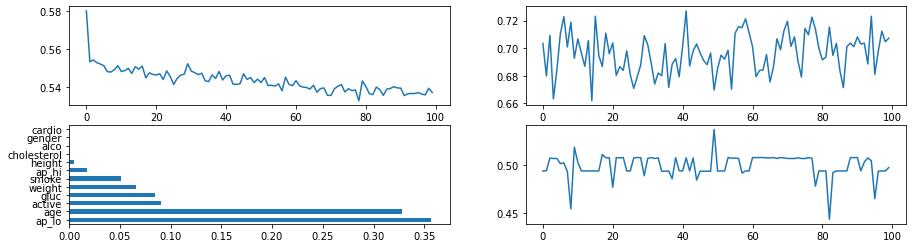

In [63]:
# plot losses
fig = plt.figure(figsize = (15, 4))

start = datetime.datetime.now()
plt.subplot(2, 2, 1)
plt.plot(clf1_nopreproc.history['loss'])

# plot accuracy
plt.subplot(2, 2, 2)
plt.plot(clf1_nopreproc.history['train_accuracy'])

plt.subplot(2, 2, 4)
plt.plot(clf1_nopreproc.history['valid_accuracy'])

# find and plot feature importance
plt.subplot(2, 2, 3)
y_pred = clf1_nopreproc.predict(x_test)
clf1_nopreproc.feature_importances_
feat_importances = pd.Series(clf1_nopreproc.feature_importances_, index=colu.columns)
feat_importances.nlargest(20).plot(kind='barh')


# determine best accuracy for test set
preds = clf1_nopreproc.predict(x_test)
test_acc = accuracy_score(preds, y_test)

# determine best accuracy for validation set
preds_valid = clf1_nopreproc.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)
end = datetime.datetime.now()
tabnet_time = end - start

tabnet_time_micro = tabnet_time / datetime.timedelta(microseconds=1)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

In [64]:
print(tabnet_time)
print(tabnet_time_micro)

0:00:01.570161
1570161.0


In [65]:
from pytorch_tabnet.pretraining import TabNetPretrainer

# TabNetPretrainer
unsupervised_model_no_preproc = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax', # "sparsemax",
    )

# fit the model
unsupervised_model_no_preproc.fit(
    x_train,
    eval_set=[x_val],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.8,

)

# Make reconstruction from a dataset
reconstructed_X, embedded_X = unsupervised_model_no_preproc.predict(x_val)
assert(reconstructed_X.shape==embedded_X.shape)

unsupervised_model_no_preproc.save_model('./test_pretrain2')
loaded_pretrain = TabNetPretrainer()
loaded_pretrain.load_model('./test_pretrain2.zip')

epoch 0  | loss: -121.38851| val_0_unsup_loss_numpy: 7769.2138671875|  0:00:06s
epoch 1  | loss: -300.35852| val_0_unsup_loss_numpy: 14785.6201171875|  0:00:13s
epoch 2  | loss: -96.07342| val_0_unsup_loss_numpy: 9309392.0|  0:00:20s
epoch 3  | loss: -191.27261| val_0_unsup_loss_numpy: 863551.5|  0:00:27s
epoch 4  | loss: -81.23383| val_0_unsup_loss_numpy: 174.9863739013672|  0:00:33s
epoch 5  | loss: -86.30237| val_0_unsup_loss_numpy: 213.91510009765625|  0:00:40s
epoch 6  | loss: -2795.72917| val_0_unsup_loss_numpy: 75061.1328125|  0:00:46s
epoch 7  | loss: -25053.36883| val_0_unsup_loss_numpy: 1655458.25|  0:00:52s
epoch 8  | loss: -117979.60478| val_0_unsup_loss_numpy: 30364554.0|  0:00:59s
epoch 9  | loss: -286390.03681| val_0_unsup_loss_numpy: 2542383.25|  0:01:05s
epoch 10 | loss: -347023.16118| val_0_unsup_loss_numpy: 10197941.0|  0:01:11s
epoch 11 | loss: -643813.86222| val_0_unsup_loss_numpy: 5037.1318359375|  0:01:17s
epoch 12 | loss: -927835.21201| val_0_unsup_loss_numpy: 4